In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['testset.csv', 'trainset.csv']


In [ ]:
dataset_train = pd.read_csv("../input/trainset.csv")

In [ ]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
5,2013-01-09,363.769043,366.789398,361.945892,366.675140,366.675140,4075700
6,2013-01-10,369.014923,370.092896,364.380066,368.344269,368.344269,3695100
7,2013-01-11,368.602600,368.816193,365.771027,367.604095,367.604095,2587000
8,2013-01-14,366.118744,368.701935,358.841095,359.288177,359.288177,5765000
9,2013-01-15,357.340851,365.125214,353.749207,360.122742,360.122742,7906300


In [ ]:
trainset = dataset_train.iloc[:,1:2].values

In [ ]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [ ]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1199, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [ ]:
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0295
Epoch 2/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0054
Epoch 3/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0038
Epoch 4/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0040
Epoch 5/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0037
Epoch 6/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0032
Epoch 7/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0035
Epoch 8/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0033
Epoch 9/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0034
Epoch 10/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0029
Epoch 11/100
1199/1199 [==============================] - 9s 7ms/step - loss: 0.0032
Epoch 12/100
1199/1199 [==============================] - 9s 7ms/step - 

In [ ]:
dataset_test =pd.read_csv("../input/testset.csv")

In [ ]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
5       363.769043
6       369.014923
7       368.602600
8       366.118744
9       357.340851
10      358.865936
11      356.536072
12      352.884827
13      350.053253
14      365.617004
15      368.225037
16      372.959259
17      373.451050
18      370.962250
19      374.434662
20      372.830109
21      376.650238
22      381.364594
23      378.105774
24      377.082428
25      382.363098
26      387.544403
27      386.684998
28      388.349152
29      387.544403
          ...     
95     1061.859985
96     1074.060059
97     1083.560059
98     1065.130005
99     1079.000000
100    1079.020020
101    1064.890015
102    1063.030029
103    1067.560059
104    1099.349976
105    1122.329956
106    1140.989990
107    1142.170044
108    1131.319946
109    1118.180054
110    1118.599976
111    1131.069946
112    1141.119995
113    1143.849976
114    1148.859985
115    1143.650024
116    1158.

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [ ]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [ ]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [ ]:
predicted_price = regressor.predict(x_test)

In [ ]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1060.9669],
       [1059.5607],
       [1062.1382],
       [1071.1857],
       [1082.9843],
       [1093.968 ],
       [1102.4915],
       [1105.2302],
       [1105.4479],
       [1104.4875],
       [1109.0391],
       [1115.7694],
       [1122.3834],
       [1127.2605],
       [1131.0854],
       [1137.9117],
       [1148.776 ],
       [1158.4279],
       [1164.7532],
       [1168.0515],
       [1167.8665],
       [1166.7338],
       [1164.827 ],
       [1156.1555],
       [1139.8356],
       [1112.7017],
       [1094.9691],
       [1086.4697],
       [1077.6523],
       [1073.6385],
       [1073.5703],
       [1075.4775],
       [1082.2805],
       [1091.726 ],
       [1099.5087],
       [1106.0602],
       [1111.9424],
       [1115.2893],
       [1118.7892],
       [1124.5618],
       [1127.3087],
       [1124.2736],
       [1109.1582],
       [1094.2224],
       [1090.1523],
       [1093.2799],
       [1103.134 ],
       [1117.746 ],
       [1135.7585],
       [1151.6923],


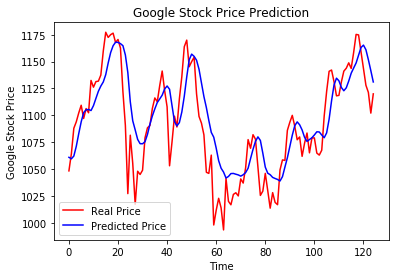

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()